In [1]:
pip install requests beautifulsoup4 pillow


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



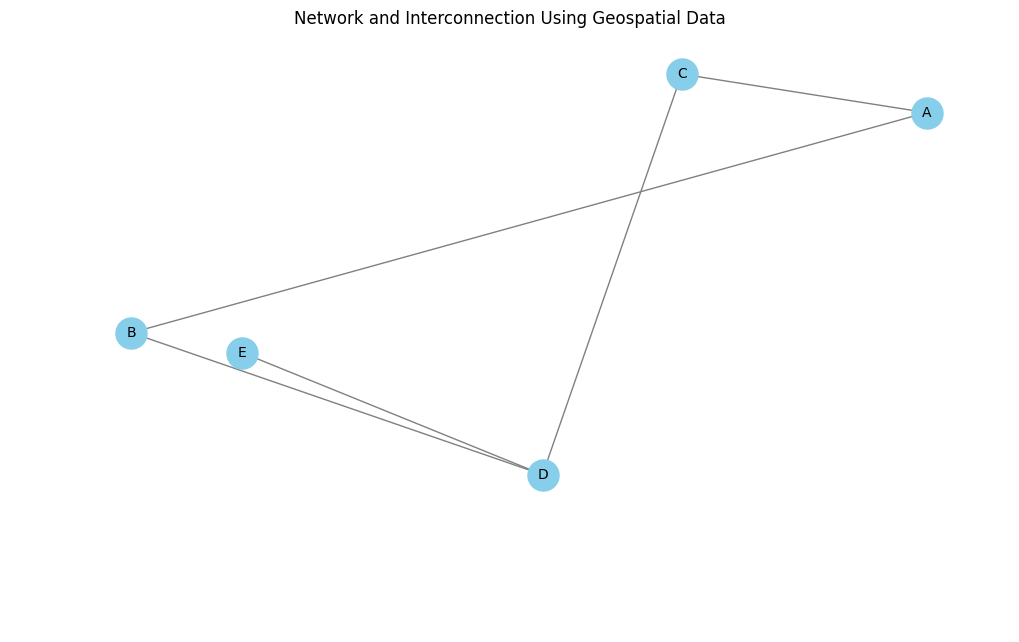

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Sample geospatial data (latitude and longitude coordinates for nodes)
locations = {
    'A': (40.7128, -74.0060),  # New York
    'B': (34.0522, -118.2437), # Los Angeles
    'C': (41.8781, -87.6298),  # Chicago
    'D': (29.7604, -95.3698),  # Houston
    'E': (33.4484, -112.0740)  # Phoenix
}

# Create a graph
G = nx.Graph()

# Add nodes with positions
for node, pos in locations.items():
    G.add_node(node, pos=pos)

# Add edges to represent connections between nodes
edges = [
    ('A', 'B'),
    ('A', 'C'),
    ('B', 'D'),
    ('C', 'D'),
    ('D', 'E')
]
G.add_edges_from(edges)

# Extract positions for visualization
pos = {node: (lon, lat) for node, (lat, lon) in locations.items()}

# Plot the network
plt.figure(figsize=(10, 6))

# Draw the network with specific node and edge styles
nx.draw(
    G, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray', font_size=10
)

# Add a grid and axis labels to make the graph more visualized
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.xticks(ticks=range(-125, -70, 5))  # Customize x-axis ticks for better visibility
plt.yticks(ticks=range(25, 45, 2))     # Customize y-axis ticks for better visibility
plt.title("Network and Interconnection Using Geospatial Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [2]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import os

# Step 1: Scrape a webpage
def scrape_webpage(url):
    print(f"Scraping webpage: {url}")
    response = requests.get(url)
    response.raise_for_status()
    
    soup = BeautifulSoup(response.text, 'html.parser')
    print(f"Page title: {soup.title.string}")
    
    # Retrieve and print all image URLs
    image_tags = soup.find_all('img')
    image_urls = [img['src'] for img in image_tags if 'src' in img.attrs]
    print(f"Found {len(image_urls)} image(s).")
    
    return image_urls

# Step 2: Retrieve an image over HTTP
def retrieve_image(image_url):
    print(f"Retrieving image: {image_url}")
    response = requests.get(image_url)
    response.raise_for_status()
    
    # Open the image with PIL
    img = Image.open(BytesIO(response.content))
    img.show()  # Display the image
    
    # Save the image locally
    if not os.path.exists('images'):
        os.makedirs('images')
    img.save(f"images/retrieved_image.{img.format.lower()}")
    print(f"Image saved as 'images/retrieved_image.{img.format.lower()}'.")
    
# Main program
if __name__ == "__main__":
    try:
        # Example URL to scrape (you can use any public webpage)
        webpage_url = "https://www.wikipedia.org/"
        
        # Scrape the webpage
        image_urls = scrape_webpage(webpage_url)
        
        # Retrieve the first image if available
        if image_urls:
            first_image_url = image_urls[0]
            # Handle relative URLs
            if not first_image_url.startswith("http"):
                first_image_url = webpage_url + first_image_url
            retrieve_image(first_image_url)
        else:
            print("No images found on the webpage.")
    except Exception as e:
        print(f"An error occurred: {e}")


Scraping webpage: https://www.wikipedia.org/
Page title: Wikipedia
Found 2 image(s).
Retrieving image: https://www.wikipedia.org/portal/wikipedia.org/assets/img/Wikipedia-logo-v2.png
Image saved as 'images/retrieved_image.png'.


In [1]:
pip install requests


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [5]:
import requests

# Web service URL (using JSONPlaceholder for testing)
url = "https://jsonplaceholder.typicode.com/posts"  # Example URL for posts

# Make a request to the web service
try:
    response = requests.get(url)

    # Check if the request was successful
    response.raise_for_status()  # Raise an exception for HTTP errors (e.g., 404, 500)

    # Parse the JSON response
    posts = response.json()  # JSON data is parsed directly into Python objects

    # Access data from JSON response
    for post in posts:
        title = post['title']
        body = post['body']
        print(f"Title: {title}, Body: {body}")

except requests.exceptions.RequestException as e:
    print(f"Error with the request: {e}")


Title: sunt aut facere repellat provident occaecati excepturi optio reprehenderit, Body: quia et suscipit
suscipit recusandae consequuntur expedita et cum
reprehenderit molestiae ut ut quas totam
nostrum rerum est autem sunt rem eveniet architecto
Title: qui est esse, Body: est rerum tempore vitae
sequi sint nihil reprehenderit dolor beatae ea dolores neque
fugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis
qui aperiam non debitis possimus qui neque nisi nulla
Title: ea molestias quasi exercitationem repellat qui ipsa sit aut, Body: et iusto sed quo iure
voluptatem occaecati omnis eligendi aut ad
voluptatem doloribus vel accusantium quis pariatur
molestiae porro eius odio et labore et velit aut
Title: eum et est occaecati, Body: ullam et saepe reiciendis voluptatem adipisci
sit amet autem assumenda provident rerum culpa
quis hic commodi nesciunt rem tenetur doloremque ipsam iure
quis sunt voluptatem rerum illo velit
Title: nesciunt quas odio, Body: repudiandae veniam q